# pyPCG Example code
## version: WIP
### Kristóf Müller (muller.kristof@itk.ppke.hu)

Import modules:

In [1]:
import pyPCG as pcg
import pyPCG.io as signal_io
import pyPCG.preprocessing as preproc
import pyPCG.segment as sgm
import pyPCG.features as ftr

Read in data:

In [2]:
data, fs = signal_io.read_signal_file("example.wav","wav")
example = pcg.pcg_signal(data,fs)

Plot data:

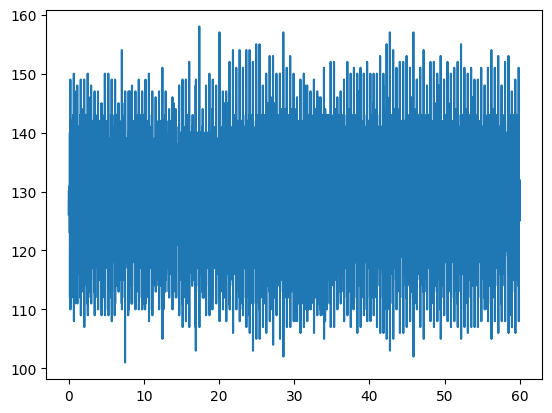

In [3]:
pcg.plot(example)

Normalization:

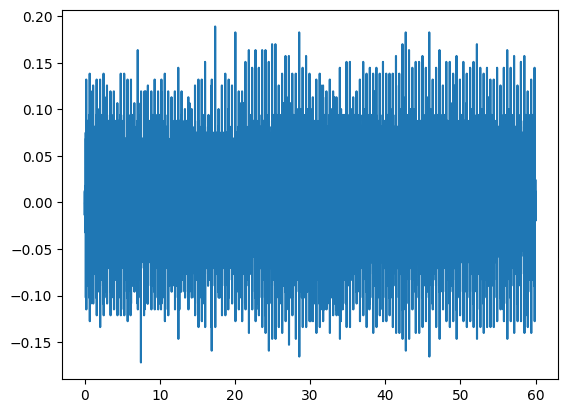

In [4]:
norm_signal = pcg.normalize(example)
pcg.plot(norm_signal)

Create processing pipeline:

In [5]:
from functools import partial
lp_filter = partial(preproc.filter, filt_ord=6, filt_cutfreq=100, filt_type="LP")
hp_filter = partial(preproc.filter, filt_ord=6, filt_cutfreq=20, filt_type="HP")

my_pipeline = pcg.process_pipeline(lp_filter,hp_filter,preproc.wt_denoise,preproc.homomorphic)

['Unit scale', 'Zero center', 'LP Filter (order-6, cut-100)', 'HP Filter (order-6, cut-20)', 'Wavelet denoise (family-coif4, level-5, th-0.2)', 'Homomorphic envelope (order-6,cut-8)']


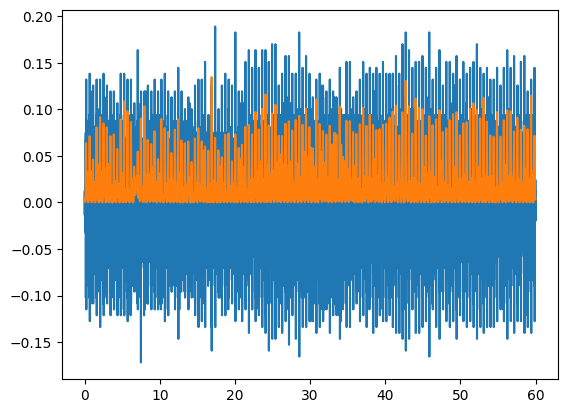

In [6]:
processed = my_pipeline.run(norm_signal)
print(processed.processing_log)
pcg.plot(norm_signal)
pcg.plot(processed)

Segment S1 sounds with peak detection

In [7]:
peakvals, peaks = sgm.adv_peak(processed)
s1,s2 = sgm.peak_sort_diff(peaks)
st,en = sgm.segment_peaks(s1,processed)

Calculate features:

In [8]:
ftr.time_delta(st,en,processed)
ftr.ramp_time(st,en,processed)
ftr.ramp_time(st,en,processed,type="exit")
ftr.zero_cross_rate(st,en,norm_signal)
ftr.peak_width(st,en,processed,factor=0.8)
ftr.peak_centroid(st,en,processed)
ftr.max_freq(st,en,norm_signal,nfft=1024)
ftr.spectral_width(st,en,norm_signal,nfft=1024)
ftr.spectral_centroid(st,en,norm_signal,nfft=1024)

(array([35.73385519, 40.60665362, 40.28180039, 38.98238748, 32.16046967,
        39.3072407 , 42.23091977, 37.35812133, 39.63209393, 36.70841487,
        36.05870841, 39.3072407 , 33.13502935, 38.00782779, 37.68297456,
        38.00782779, 45.15459883, 31.18590998, 44.18003914, 40.60665362,
        36.05870841, 36.38356164, 36.70841487, 38.98238748, 39.3072407 ,
        35.40900196, 30.21135029, 29.88649706, 49.70254403, 36.38356164,
        41.25636008, 36.38356164, 39.63209393, 37.0332681 , 36.70841487,
        31.83561644, 40.93150685, 32.4853229 , 42.23091977, 43.20547945,
        39.63209393, 33.13502935, 30.21135029, 32.16046967, 34.7592955 ,
        36.70841487, 42.55577299, 33.45988258, 35.73385519, 38.00782779,
        33.78473581, 31.51076321, 36.70841487, 34.10958904, 33.78473581,
        36.70841487, 31.51076321, 32.4853229 , 33.45988258, 33.13502935,
        35.73385519, 36.70841487, 33.13502935, 31.51076321, 34.10958904,
        34.7592955 , 35.08414873, 33.45988258, 32.8

In [9]:
#instert stats module example here